#<a> Transformers for Emoji prediction in Federated systems. </a>

> ![](https://i.imgur.com/fOeJmu3.jpg)



> The experimental landscape in natural language processing for social media is too fragmented. Each year, new shared tasks and
datasets are proposed, ranging from classics
like sentiment analysis to irony detection or
emoji prediction. Therefore, it is unclear what
the current state of the art is, as there is
no standardized evaluation protocol, neither a
strong set of baselines trained on such domainspecific data.

> [Source: TWEETEVAL paper](https://arxiv.org/pdf/2010.12421.pdf) & [Source Photo](https://i.imgur.com/fOeJmu3.jpg)






## <a>Install some packages 

In [ ]:
!pip install flwr["simulation"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.7 MB/s 
     |████████████████████████████████| 1.0 MB 28.1 MB/s 
     |████████████████████████████████| 54.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.1 MB 41.6 MB/s 
     |████████████████████████████████| 8.8 MB 51.4 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 90 kB 8.7 MB/s 
     |████████████████████████████████| 201 kB 44.4 MB/s 
     |████████████████████████████████| 3.0 MB 40.9 MB/s 
     |████████████████████████████████| 128 kB 43.6 MB/s 
     |████████████████████████████████| 291 kB 57.5 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 468 kB 43.5 MB/s 
  Created wheel for gpustat: filename=gpustat-1.0.0-py3-none-any.whl size=19889 sha256=455d0f6ea7b1e61d5b32c4f67946cc460e3a7537121b6162f1f634362657a084
  S

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.2 MB/s 
     |████████████████████████████████| 163 kB 64.7 MB/s 
     |████████████████████████████████| 7.6 MB 37.7 MB/s 


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 5.3 MB/s 
     |████████████████████████████████| 115 kB 74.3 MB/s 
     |████████████████████████████████| 212 kB 58.1 MB/s 
     |████████████████████████████████| 127 kB 50.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## <a>Imports 

In [ ]:
import random
import pandas as pd
import gdown

import json
import re
import string 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import OrderedDict
import warnings

import flwr as fl
import torch
import numpy as np

from torch.utils.data import DataLoader
from datasets import load_dataset, load_metric, Dataset

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import AdamW

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from scipy.special import softmax

import csv
import urllib.request

import gc

> ## Dwonload the data from our Drive



In [ ]:
# url = "https://drive.google.com/drive/folders/1vpMiGL4_bwguZO3hyZGMbz1v8pKTolmq?usp=sharing"
url = "https://drive.google.com/drive/folders/1fbLZaQmwuRXYlx_wUsfsAiG18e_we_zC?usp=sharing"
gdown.download_folder(url)

Retrieving folder list


Processing file 10jJiPSad7R-nOpUDHz0G9JFCt8FRJYml Karim_140K_es.csv
Processing file 1K0Q2d8VgiJPvwkTbXgGD9eGaaYbANMcu Karim_300K_it.csv
Processing file 1ATgspw32caK3EomNPa3DvQ51NiSf4VPQ Karim_450K_fr.csv
Processing file 1Bi2v9_4Q0INv-CkYQk7Ofgehe7dPtktP Karim_620K_en.csv
Processing file 1WVsf_YZLM11Wr8DDYlyUjxPQjpzCUDzk test_sentences.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=10jJiPSad7R-nOpUDHz0G9JFCt8FRJYml
To: /content/Good_one/Karim_140K_es.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 44.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K0Q2d8VgiJPvwkTbXgGD9eGaaYbANMcu
To: /content/Good_one/Karim_300K_it.csv
100%|██████████| 54.6M/54.6M [00:00<00:00, 182MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ATgspw32caK3EomNPa3DvQ51NiSf4VPQ
To: /content/Good_one/Karim_450K_fr.csv
100%|██████████| 84.6M/84.6M [00:00<00:00, 205MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bi2v9_4Q0INv-CkYQk7Ofgehe7dPtktP
To: /content/Good_one/Karim_620K_en.csv
100%|██████████| 93.4M/93.4M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WVsf_YZLM11Wr8DDYlyUjxPQjpzCUDzk
To: /content/Good_one/test_sentences.csv
100%|██████████| 228/228 [00:00<00:00, 495kB/s]
Download completed


['/content/Good_one/Karim_140K_es.csv',
 '/content/Good_one/Karim_300K_it.csv',
 '/content/Good_one/Karim_450K_fr.csv',
 '/content/Good_one/Karim_620K_en.csv',
 '/content/Good_one/test_sentences.csv']

In [ ]:
# read it by adding the headers
# df = pd.read_csv("/content/folders_for_fun/140K_dataSet.csv", header = None, names = ['Tweet', 'Label'])
# df = pd.read_csv("/content/Good_one/Karim_620K_en.csv")
# ['/content/Good_one/Karim_140K_es.csv','/content/Good_one/Karim_300K_it.csv','/content/Good_one/Karim_450K_fr.csv','/content/Good_one/Karim_620K_en.csv']
df = pd.concat(map(pd.read_csv, ['/content/Good_one/Karim_620K_en.csv']))

In [ ]:
df

,Tweet,Label_2,Label,Tweet_cleaned
0,@mikedoubleu61 @Procasstinator_ @fut_fg I got ...,😂,2,@mikedoubleu @procasstinator @futfg got gold c...
1,@moomin_et He organized all that in 2 days wit...,😂,2,@moominet organized days hundreds let use
2,"Mfs be arguing boobs or ass, like bro vibes 🔥",🔥,4,mfs arguing boobs ass like bro vibes
3,Nursing up on back muscles right now. Fortunat...,😁,16,nursing back muscles right fortunately exam no...
4,@lynnnotglenn @B_TwentyThree @yalldkjay oh shi...,😜,19,@lynnnotglenn @b twenty three @yalldkjay oh sh...
...,...,...,...,...
623668,… and thanksgiving… and 🎄,🎄,17,thanksgiving
623669,Great play by Ward let’s go the story of killd...,🎄,17,great play ward let go story killdozer makes s...
623670,it’s a trap y’all don’t use your phone out of ...,🎄,17,trap use phone case fuck supposed overwatch di...
623671,"qui attend maria carey et son post insta ""xmas...",🎄,17,qui attend maria carey et son post insta xmas ...


In [ ]:
# check any null values
df.isnull().sum()

Tweet            0
Label_2          0
Label            0
Tweet_cleaned    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Tweet            0
Label_2          0
Label            0
Tweet_cleaned    0
dtype: int64

In [ ]:
#print how many duplicate rows in the dataframe
print(df.duplicated('Tweet_cleaned').sum())

0


In [ ]:
df = df.drop_duplicates('Tweet_cleaned')

In [ ]:
#print how many duplicate rows in the dataframe
print(df.duplicated('Tweet_cleaned').sum())

0


> 

In [ ]:
# Mapping each emoji
emoji_to_idx = {'❤': 0, '😍': 1, '😂': 2, '💕': 3,  '🔥': 4, '😊': 5, '😎': 6, '✨': 7, '💙': 8, '😘': 9, '📷': 10, '🇺🇸': 11, '☀': 12,\

                '💜': 13, '😉': 14,'💯': 15, '😁': 16, '🎄': 17, '📸': 18, '😜': 19}

In [ ]:
# We won't use this method but just in case you want to try it.
def get_emoji(input_):
  list_ = []
  for i in range(20):
    # print(list(emoji_to_idx.keys())[list(emoji_to_idx.values()).index(city_count.index[i])])
    list_.append(list(emoji_to_idx.keys())[list(emoji_to_idx.values()).index(input_[i])])
  return list_

In [ ]:
# To compare each emoji to each other before over-sampling
def distribution_method(df_):

  # in the column 'Label'
  c_count  = df_['Label'].value_counts()
  c_count = c_count[:,]
  plt.figure(figsize=(12,5))
  sns.barplot(c_count.index, c_count.values, alpha=0.8)
  plt.title('The distribution for each class/Label')
  # plt.ylabel('Number of Occurrences', fontsize=20)
  plt.xlabel('Label', fontsize=20)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


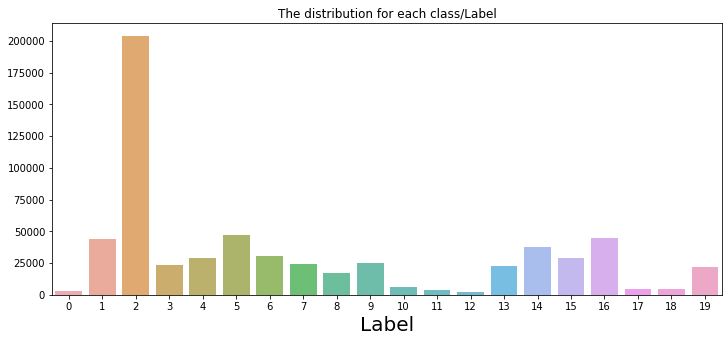

In [ ]:
# you just need to call it
distribution_method(df)

> ## <a> Random Oversampling Imbalanced Datasets

> Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df['Tweet_cleaned'].values
y = df["Label"].values

os = RandomOverSampler()

X = X.reshape(-1,1)

X, y = os.fit_resample(X, y)

X = X.reshape(-1,)
print('X shape : ', X.shape, '\n')

X shape :  (4077760,) 



In [ ]:
df = pd.DataFrame({'Tweet_cleaned': np.array(X), 'Label': np.array(y)}, columns=['Tweet_cleaned', 'Label'])

In [ ]:
df

,Tweet_cleaned,Label
0,@mikedoubleu @procasstinator @futfg got gold c...,2
1,@moominet organized days hundreds let use,2
2,mfs arguing boobs ass like bro vibes,4
3,nursing back muscles right fortunately exam no...,16
4,@lynnnotglenn @b twenty three @yalldkjay oh sh...,19
...,...,...
4077755,cost capstappen grip,19
4077756,cant contend im blocking,19
4077757,love marriage love story nigga munch gon na ea...,19
4077758,physics best science doesnt nonsensical proces...,19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


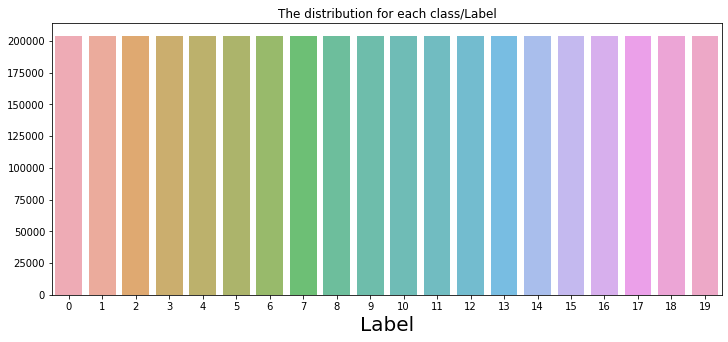

In [ ]:
distribution_method(df)

> ## Server & clients Data split

> As you know in the federated systems we need to train the model on some data at first then train the rest of the data on the clients sys to make a good evaluation.

> This method just for splitting , this is not the same ratio that will be trained by the model.

In [ ]:
# this method just for splitting 
def splitting_method(df_, name1 ,name2, test_size = 0.5):
  y = pd.DataFrame(df_, columns = ["Label"])  
  X = pd.DataFrame(df_, columns = ['Tweet_cleaned'])

  X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=105)

  df_t = pd.DataFrame(X_train, columns = ['Tweet_cleaned'])
  df_yt = pd.DataFrame(y_train, columns = ['Label'])

  train_data = pd.concat([df_t, df_yt], axis=1)
  train_data.to_csv(name1+".csv", index = False,)

  df_xtest = pd.DataFrame(X_test, columns = ['Tweet_cleaned'])
  df_ytest = pd.DataFrame(y_test, columns = ['Label'])

  test_data = pd.concat([df_xtest, df_ytest], axis=1)
  # print(test_data.isnull().sum())
  test_data.to_csv(name2+".csv", index = False,)

  # return train_data
  return test_data


In [ ]:
# you can call it :)
splitting_method(df,'centralized_dataset','fedrated_dataset',test_size = 0.5)

,Tweet_cleaned,Label
603,keep mfs distance @egalita like piet mondrian ...,5
2561178,savingfootballshirts findingfootballshirts foo...,11
2476317,world record holder nia ali,11
3744538,almost impossible see ship snap photo anyone e...,18
2234229,kien nature hourly nature nomaddream wonderlus...,10
...,...,...
3266381,needed hear things every @sandibachom @greg ab...,15
3610966,rams twitter rams house sale tix rams vs broncos,17
3677546,work progress discord christmas card year,17
829339,@jennyyylene silky smooth smell amazing,1


In [ ]:
df_c= pd.read_csv("/content/centralized_dataset.csv")

In [ ]:
df_c

,Tweet_cleaned,Label
0,@astros love houstonian also love hated,19
1,ask shit,15
2,@teemarty long johns,19
3,dating life sux awkward phone call hinge dude ...,7
4,got called racist white person family member c...,8
...,...,...
2038875,use one tv set remember american got news ruli...,11
2038876,follow omg pls really hope interact s members ...,12
2038877,ari @above tp forget uniform,9
2038878,hey @walsh freedom listening latest us dem rem...,14


In [ ]:
df_f = pd.read_csv("/content/fedrated_dataset.csv")

In [ ]:
df_f

,Tweet_cleaned,Label
0,keep mfs distance @egalita like piet mondrian ...,5
1,savingfootballshirts findingfootballshirts foo...,11
2,world record holder nia ali,11
3,almost impossible see ship snap photo anyone e...,18
4,kien nature hourly nature nomaddream wonderlus...,10
...,...,...
2038875,needed hear things every @sandibachom @greg ab...,15
2038876,rams twitter rams house sale tix rams vs broncos,17
2038877,work progress discord christmas card year,17
2038878,@jennyyylene silky smooth smell amazing,1


> ### Split the server data for server training

In [ ]:
df_server = pd.read_csv("/content/centralized_dataset.csv")

In [ ]:
# you can call it :)
splitting_method(df_server,'TrainServer','TestServer',0.1)

,Tweet_cleaned,Label
1605788,merry christmas incredible amp devoted community,17
1084069,actress park sooyoung actor choo yooungwoo all...,18
321926,fact lucy tim break eye contact noticed starin...,4
1759165,ythey tackled eachother im gon na cry dnf fina...,17
1269301,@jimtober promise @bt stwt super handsome love...,13
...,...,...
25029,@adca dev @minis retrograde looking nice cant ...,5
1707903,tmg oh man reaction tea fix,5
1911842,sinatfotos @sinat savier photography drakness ...,10
1001606,@lockedbyki rt @collector crispy new years lust,17


> ### Split the federated data for clients training

In [ ]:
df_clients = pd.read_csv("/content/fedrated_dataset.csv")

In [ ]:
# you can call it :)
splitting_method(df_clients,'F1_Train_clients','F1_test_clients',0.1)

,Tweet_cleaned,Label
1605788,fine thanks dave xx @hornydaddyjm tweet matche...,2
1084069,morninggggg,12
321926,believe hoge,7
1759165,@aaaaaarrl thank,13
1269301,rt @nighthawk crypto zoogz get get lost @monke...,6
...,...,...
25029,crazy times ole girl must air malibu cos thirs...,19
1707903,like tweet say something nice,5
1911842,akasa reply times,6
1001606,@margyh awwww,1


# <a> 1. The start of the central training server

> ### The Tokenizer for `Multilingual-MiniLM-L12-H384` model. 

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")
# CHECKPOINT = "distilbert-base-uncased"  # transformer model checkpoint
# task='emoji'
# CHECKPOINT = f"cardiffnlp/twitter-roberta-base-{task}"
CHECKPOINT = "microsoft/Multilingual-MiniLM-L12-H384"

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# method to load our data 
def load_data(A_train, A_test):

    # raw_datasets = load_dataset("csv", data_files="/content/emojify_data.csv")
    raw_datasets = load_dataset("csv", data_files={"train": A_train, "test": A_test})
    raw_datasets = raw_datasets.shuffle(seed=42)

    # # remove unnecessary data split
    # del raw_datasets["unsupervised"]

    tokenizer = AutoTokenizer.from_pretrained(CHECKPOINT)

    def tokenize_function(examples):
        return tokenizer(examples["Tweet_cleaned"], truncation=True)


    # population_train = random.sample(range(len(raw_datasets["train"])), raw_datasets['train'].num_rows)
    # population_test = random.sample(range(len(raw_datasets["test"])), raw_datasets['test'].num_rows)

    # Note : Before we train our model on the whole data, for simplicity's sake, you can only train it on 3000 records or less.

    # random 100 samples
    population_train = random.sample(range(len(raw_datasets["train"])), 1000)
    population_test = random.sample(range(len(raw_datasets["test"])), 100)

    tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

    tokenized_datasets["train"] = tokenized_datasets["train"].select(population_train)
    tokenized_datasets["test"] = tokenized_datasets["test"].select(population_test)

    tokenized_datasets = tokenized_datasets.remove_columns(["Tweet_cleaned"])
    tokenized_datasets = tokenized_datasets.rename_column("Label", "labels")

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

    trainloader = DataLoader(
        tokenized_datasets["train"],
        shuffle=True,
        batch_size=24,
        collate_fn=data_collator,
    )


    testloader = DataLoader(
        tokenized_datasets["test"], batch_size=24, collate_fn=data_collator
    )

    return trainloader, testloader

> Train and test loader for server/centralized data.

In [ ]:
trainloader_s , testloader_s = load_data("/content/TrainServer.csv","/content/TestServer.csv")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-fa428c5ad7f1a70d/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1835 [00:00<?, ?ba/s]

  0%|          | 0/204 [00:00<?, ?ba/s]

> Train and test loader for clients/federated data.

In [ ]:
trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-638e516aaadc9f9e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1835 [00:00<?, ?ba/s]

  0%|          | 0/204 [00:00<?, ?ba/s]

In [ ]:
def my_plot(epochs, loss, type_  ,acc):
    # plt.ylabel(type_)
    plt.xlabel('No. of epochs')
    # plt.plot()
    plt.title(type_)
    plt.plot(epochs, acc,'b', label='acc')
    plt.plot(epochs, loss,'r', label='loss')
    plt.legend(['acc', 'loss'])
    plt.show()

In [ ]:
def train(net, trainloader, epochs):
    optimizer = AdamW(net.parameters(), lr=5e-5)
    net.train()
    
    # net.to('cuda')
    # predictions = torch.tensor([[1, 2, 3], [4, 5, 6]])
    
    outputs_ = []
    outputs_bbb = []
    loss_vals = []
    acc_vals = []


    for ep in range(epochs):
        outputs_ = []
        outputs_bbb = []
        epoch_loss= []
        acc_each_epock = []
        
        for batch in trainloader:
            batch = {k: v.to(DEVICE) for k, v in batch.items()}
            outputs = net(**batch)
            loss = outputs.loss
            logits = outputs.logits
            # print('outputs.loss : ' , outputs.loss , 'outputs.acc : ' ,outputs.logits)
            metric = load_metric("accuracy")
            predictions = torch.argmax(logits, dim=-1)

            outputs_.append(predictions)
            outputs_bbb.append(batch["labels"])
            
            # print(type(predictions))
            # print(metric.compute(predictions=predictions, references=batch["labels"]))

            acc_each_epock.append(metric.compute(predictions=predictions, references=batch["labels"])['accuracy'])

            loss.backward()
            epoch_loss.append(loss.item())
            optimizer.step()
            optimizer.zero_grad()

            gc.collect()

            torch.cuda.empty_cache()

        print('Epoch No :' ,str(ep+1), 'Loss : ' , sum(epoch_loss)/len(epoch_loss) , 'ACC : ' , sum(acc_each_epock)/len(acc_each_epock))
        acc_dectionary = metric.compute(predictions=predictions, references=batch["labels"])
        acc_vals.append(acc_dectionary['accuracy'])
        loss_vals.append(sum(epoch_loss)/len(epoch_loss))

    # net.to('cpu')
    result = torch.cat(outputs_, dim=0).cpu().numpy()
    res = torch.cat(outputs_bbb, dim=-1).cpu().numpy()
    cf_matrix = classification_report(res, result)
    print(cf_matrix)
    # plotting
    my_plot(np.linspace(1, epochs, epochs).astype(int), loss_vals, 'Loss/Acc', acc_vals)
    # my_plot(np.linspace(1, epochs, epochs).astype(int), acc_vals, 'Accuracy')
    # net.to('cuda')



In [ ]:
def test(net, testloader):
    metric = load_metric("accuracy")
    loss = 0
    net.eval()
    
    outputs_ = []
    outputs_bbb = []
    epoch_loss= []

    for batch in testloader:
        batch = {k: v.to(DEVICE) for k, v in batch.items()}
        with torch.no_grad():
            outputs = net(**batch)
        logits = outputs.logits
        # loss += outputs.loss.item()
        epoch_loss.append(outputs.loss.item())
        predictions = torch.argmax(logits, dim=-1)
        
        outputs_.append(predictions)
        outputs_bbb.append(batch["labels"])
            
        metric.add_batch(predictions=predictions, references=batch["labels"])
    # loss /= len(testloader.dataset)
    loss = sum(epoch_loss)/len(epoch_loss)
    accuracy = metric.compute()["accuracy"]

    result = torch.cat(outputs_, dim=0).cpu().numpy()
    res = torch.cat(outputs_bbb, dim=-1).cpu().numpy()
    cf_matrix = classification_report(res, result)
    print(cf_matrix)

    # return loss, accuracy
    print('Loss : ' , loss , 'ACC : ' , accuracy)

> #### Train & Test the Model

In [ ]:
# Create model
net_xlm = AutoModelForSequenceClassification.from_pretrained( CHECKPOINT, num_labels=20 ).to(DEVICE)

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate


Epoch No : 1 Loss :  3.003364006678263 ACC :  0.05406746031746032
              precision    recall  f1-score   support

           0       0.05      0.25      0.08        48
           1       0.07      0.30      0.12        70
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        49
           7       0.00      0.00      0.00        55
           8       0.07      0.07      0.07        44
           9       0.04      0.02      0.03        50
          10       0.04      0.06      0.05        51
          11       0.00      0.00      0.00        44
          12       0.04      0.02      0.03        50
          13       0.20      0.02      0.04        49
          14       0.00      0.00      0.00        48
          15       0.05      0.17      0.08        59
          16   

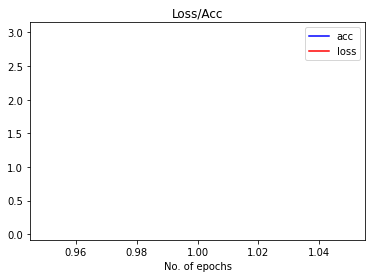

In [ ]:
# train(net_bert, trainloader_s, 10)
# train(net_bert, trainloader_s, 5)
train(net_xlm, trainloader_s, 1)

In [ ]:
test(net_xlm, testloader_s)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.05      0.80      0.09         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

In [ ]:
test(net_xlm, testloader_f)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      1.00      0.05         2
           2       0.10      0.20      0.13         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.21      0.60      0.32         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00    

> ### Save the model

In [ ]:
torch.save(net_xlm,'/content/xlm_multi_en_only.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
torch.save(net_xlm,'/content/drive/MyDrive/Federated sys PJ/bert_base_multilingual/xlm_multi_en_only.pt')


In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
5

5

> ## Test our model with input sentace and compare it with the original model from Huggingface 

In [ ]:
def test_with_sentance(text,net):

  # text = "good morning"
  # text = preprocess(text)

  encoded_input = tokenizer(text, return_tensors='pt')
  net.to('cpu')
  # print(type())
  # encoded_input = {k: v.to(DEVICE) for k, v in encoded_input.items()}
  output = net(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  # download label mapping
  labels=[]
  mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emoji/mapping.txt"
  with urllib.request.urlopen(mapping_link) as f:
      html = f.read().decode('utf-8').split("\n")
      csvreader = csv.reader(html, delimiter='\t')
  labels = [row[1] for row in csvreader if len(row) > 1]

  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  for i in range(scores.shape[0]):
      l = labels[ranking[i]]
      s = scores[ranking[i]]
      print(f"{ranking[i]}) {l} {np.round(float(s), 4)}")

      if i == 2 :
        break

  # net.to('cuda')


In [ ]:
test_with_sentance("Good morning",net_xlm)

12) ☀ 0.1052
1) 😍 0.093
0) ❤ 0.0871


In [ ]:
test_with_sentance("I love her",net_xlm)

12) ☀ 0.0963
1) 😍 0.0907
0) ❤ 0.0817


In [ ]:
test_with_sentance("Nice car",net_xlm)

1) 😍 0.0693
2) 😂 0.0582
7) ✨ 0.0578


In [ ]:
test_with_sentance("Very nice car",net_xlm)

1) 😍 0.0861
12) ☀ 0.0764
0) ❤ 0.0658


In [ ]:
test_with_sentance("I am happy",net_xlm)

12) ☀ 0.1016
1) 😍 0.0909
0) ❤ 0.0836


In [ ]:
test_with_sentance("I am very happy",net_xlm)

12) ☀ 0.0987
1) 😍 0.0905
0) ❤ 0.0835


# <a> 2. The Federated system with Flower Framework ( IID ).

> ## <a> 2.1 The first stage with `Multilingual-MiniLM-L12-H384 model` for the Federated systems with our model

> Note: for this stage we will test our model with the federated test dataset.

In [ ]:
model_loaded = torch.load('/content/xlm_multi_en_only.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

> ### <a>Flower client 

In [ ]:
# Flower client
class IMDBClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, testloader, cid) -> None:
        self.net = net
        self.trainloader = trainloader
        self.testloader = testloader
        self.cid = cid

    def get_parameters(self, config):
        return [val.cpu().numpy() for _, val in self.net.state_dict().items()]

    def set_parameters(self, parameters):
        params_dict = zip(self.net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        self.net.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        
        print("Training Started...")
        train(self.net, self.trainloader, epochs=1)
        print("Training Finished.")

        loss, accuracy = test(self.net, self.testloader)
        print('Client No. : ' , self.cid  , ' Acc per client : ', accuracy)

        return self.get_parameters(config={}), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = test(self.net, self.testloader)
        print('loss : ', loss , '  accuracy : ' ,accuracy)
        return float(loss), len(self.testloader), {"accuracy": float(accuracy)}


In [ ]:
def client_fn(cid: str) -> fl.client.Client:


    # trainloader, testloader = load_data()
    # trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

    # start the partitioning

    partition_size = len(trainloader_f) // NUM_CLIENTS
    idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size

    partition_size_testloader = len(testloader_f) // NUM_CLIENTS
    idx_from_testloader, idx_to_testloader = int(cid) * partition_size_testloader, (int(cid) + 1) * partition_size_testloader

    list_partition = []
    for i in trainloader_f:
      list_partition.append(i)

    list_partitiontes_testloader = []

    # the centralized and federated test
    for i in testloader_f:
      list_partitiontes_testloader.append(i)

    # this is for the second stage.

    # for i in testloader_s:
    #   list_partitiontes_testloader.append(i)
        
    
    list_partition = list_partition[idx_from:idx_to]
    # list_partitiontes_testloader = list_partitiontes_testloader[idx_from:idx_to]

    # Create and return client
    return IMDBClient(model_loaded, list_partition, list_partitiontes_testloader, cid)

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    # res = list(map(truediv, accuracies, examples))

    print("###  metrics : ", metrics)
    for num_examples, m in metrics:
      print("### num_examples : " , num_examples ,' m : ' , m , ' type of m ' , type(m),'\n')
      print('### m["accuracy"] : ' , m["accuracy"]  ) 
    
    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples), "accuracy client": metrics}

In [ ]:
NUM_CLIENTS = 2

# Create FedAvg strategy
strategy=fl.server.strategy.FedAvg(

        evaluate_metrics_aggregation_fn=weighted_average,  # <-- pass the metric aggregation function

        # fraction_fit=0.1,  # Sample 10% of available clients for training
        # fraction_evaluate=0.05,  # Sample 5% of available clients for evaluation
        # min_fit_clients=10,  # Never sample less than 10 clients for training
        # min_evaluate_clients=NUM_CLIENTS,  # Never sample less than 5 clients for evaluation
        # min_available_clients=int(NUM_CLIENTS * 0.75),  # Wait until at least 75 clients are available
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=1),
    strategy=strategy,
)

> ## <a> 2.2 The second stage with `Multilingual-MiniLM-L12-H384 model` for the Federated systems with our model

> Note : for this stage we will test our model with the centralized test dataset

In [ ]:
model_loaded = torch.load('/content/xlm_multi_en_only.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

> ### <a>Flower client 

In [ ]:
# Flower client
class IMDBClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, testloader, cid) -> None:
        self.net = net
        self.trainloader = trainloader
        self.testloader = testloader
        self.cid = cid

    def get_parameters(self, config):
        return [val.cpu().numpy() for _, val in self.net.state_dict().items()]

    def set_parameters(self, parameters):
        params_dict = zip(self.net.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
        self.net.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        
        print("Training Started...")
        train(self.net, self.trainloader, epochs=1)
        print("Training Finished.")

        loss, accuracy = test(self.net, self.testloader)
        print('Client No. : ' , self.cid  , ' Acc per client : ', accuracy)
        
        return self.get_parameters(config={}), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = test(self.net, self.testloader)
        print('loss : ', loss , '  accuracy : ' ,accuracy)
        return float(loss), len(self.testloader), {"accuracy": float(accuracy)}


In [ ]:
def client_fn(cid: str) -> fl.client.Client:

    # trainloader, testloader = load_data()
    # trainloader_f , testloader_f = load_data("/content/F1_Train_clients.csv","/content/F1_test_clients.csv")

    partition_size = len(trainloader_f) // NUM_CLIENTS
    idx_from, idx_to = int(cid) * partition_size, (int(cid) + 1) * partition_size

    partition_size_testloader = len(testloader_f) // NUM_CLIENTS
    idx_from_testloader, idx_to_testloader = int(cid) * partition_size_testloader, (int(cid) + 1) * partition_size_testloader

    list_partition = []
    for i in trainloader_f:
      list_partition.append(i)

    list_partitiontes_testloader = []

    # the centralized and federated test

    # for i in testloader_f:
    #   list_partitiontes_testloader.append(i)

    for i in testloader_s:
      list_partitiontes_testloader.append(i)
        
    
    list_partition = list_partition[idx_from:idx_to]
    # list_partitiontes_testloader = list_partitiontes_testloader[idx_from:idx_to]

    # Create and return client
    return IMDBClient(model_loaded, list_partition, list_partitiontes_testloader, cid)

In [ ]:
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    # Multiply accuracy of each client by number of examples used
    accuracies = [num_examples * m["accuracy"] for num_examples, m in metrics]
    examples = [num_examples for num_examples, _ in metrics]
    # res = list(map(truediv, accuracies, examples))

    print("###  metrics : ", metrics)
    for num_examples, m in metrics:
      print("### num_examples : " , num_examples ,' m : ' , m , ' type of m ' , type(m),'\n')
      print('### m["accuracy"] : ' , m["accuracy"]  ) 
    
    # Aggregate and return custom metric (weighted average)
    return {"accuracy": sum(accuracies) / sum(examples), "accuracy client": metrics}

In [ ]:
NUM_CLIENTS = 2

# Create FedAvg strategy
strategy=fl.server.strategy.FedAvg(
        evaluate_metrics_aggregation_fn=weighted_average,  # <-- pass the metric aggregation function
        
        # fraction_fit=0.1,  # Sample 10% of available clients for training
        # fraction_evaluate=0.05,  # Sample 5% of available clients for evaluation
        # min_fit_clients=10,  # Never sample less than 10 clients for training
        # min_evaluate_clients=NUM_CLIENTS,  # Never sample less than 5 clients for evaluation
        # min_available_clients=int(NUM_CLIENTS * 0.75),  # Wait until at least 75 clients are available
)

# Start simulation
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_CLIENTS,
    config=fl.server.ServerConfig(num_rounds=1),
    strategy=strategy,
)

# <a> 3. The start of the central training server on the federated dataset

> #### Train & Test the Model

In [ ]:
# load the model
model_loaded = torch.load('/content/xlm_multi_en_only.pt')

In [ ]:
DEVICE = torch.device("cpu")

In [ ]:
DEVICE

device(type='cpu')

In [ ]:
model_loaded.to(DEVICE)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch No : 1 Loss :  2.9795629580815635 ACC :  0.08035714285714286
              precision    recall  f1-score   support

           0       0.11      0.14      0.12        50
           1       0.07      0.24      0.11        45
           2       0.06      0.15      0.09        52
           3       0.06      0.07      0.06        56
           4       0.00      0.00      0.00        52
           5       0.03      0.06      0.04        54
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        41
           9       0.08      0.24      0.12        71
          10       0.20      0.11      0.14        57
          11       0.00      0.00      0.00        50
          12       0.21      0.29      0.24        45
          13       0.00      0.00      0.00        55
          14       0.00      0.00      0.00        42
          15       0.07      0.07      0.07        57
          16  

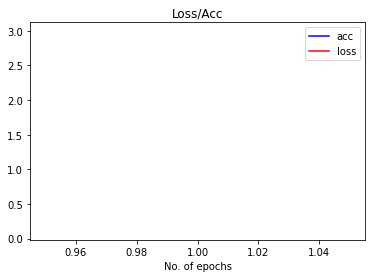

In [ ]:
# train(net_bert, trainloader_f, 10)
# train(net_bert, trainloader_f, 5)
train(model_loaded, trainloader_f, 1)

In [ ]:
test(net_bert, testloader_s)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.05      0.80      0.09         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

In [ ]:
test(net_bert, testloader_f)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      1.00      0.05         2
           2       0.10      0.20      0.13         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.21      0.60      0.32         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          18       0.00    

> to save our model

In [ ]:
torch.save(net_bert,'/content/xlm_multi_en_only.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(net_bert,'/content/drive/MyDrive/Federated sys PJ/bert_base_multilingual/xlm_multi_en_only.pt')


In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()